In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
train_path = 'C:/Users/Lenovo/Desktop/Weed_CNN/WeedCrop.v1i.yolov5pytorch/train'
valid_path = 'C:/Users/Lenovo/Desktop/Weed_CNN/WeedCrop.v1i.yolov5pytorch/valid'
test_path = 'C:/Users/Lenovo/Desktop/Weed_CNN/WeedCrop.v1i.yolov5pytorch/test'

In [3]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 2469 images belonging to 2 classes.
Found 235 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [4]:
assert train_batches.n == 2469
assert valid_batches.n == 235
assert test_batches.n == 118
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

In [5]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr,  axes):
        ax.imshow(img)
        ax.axis('off')
        plt.tight_layout()
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


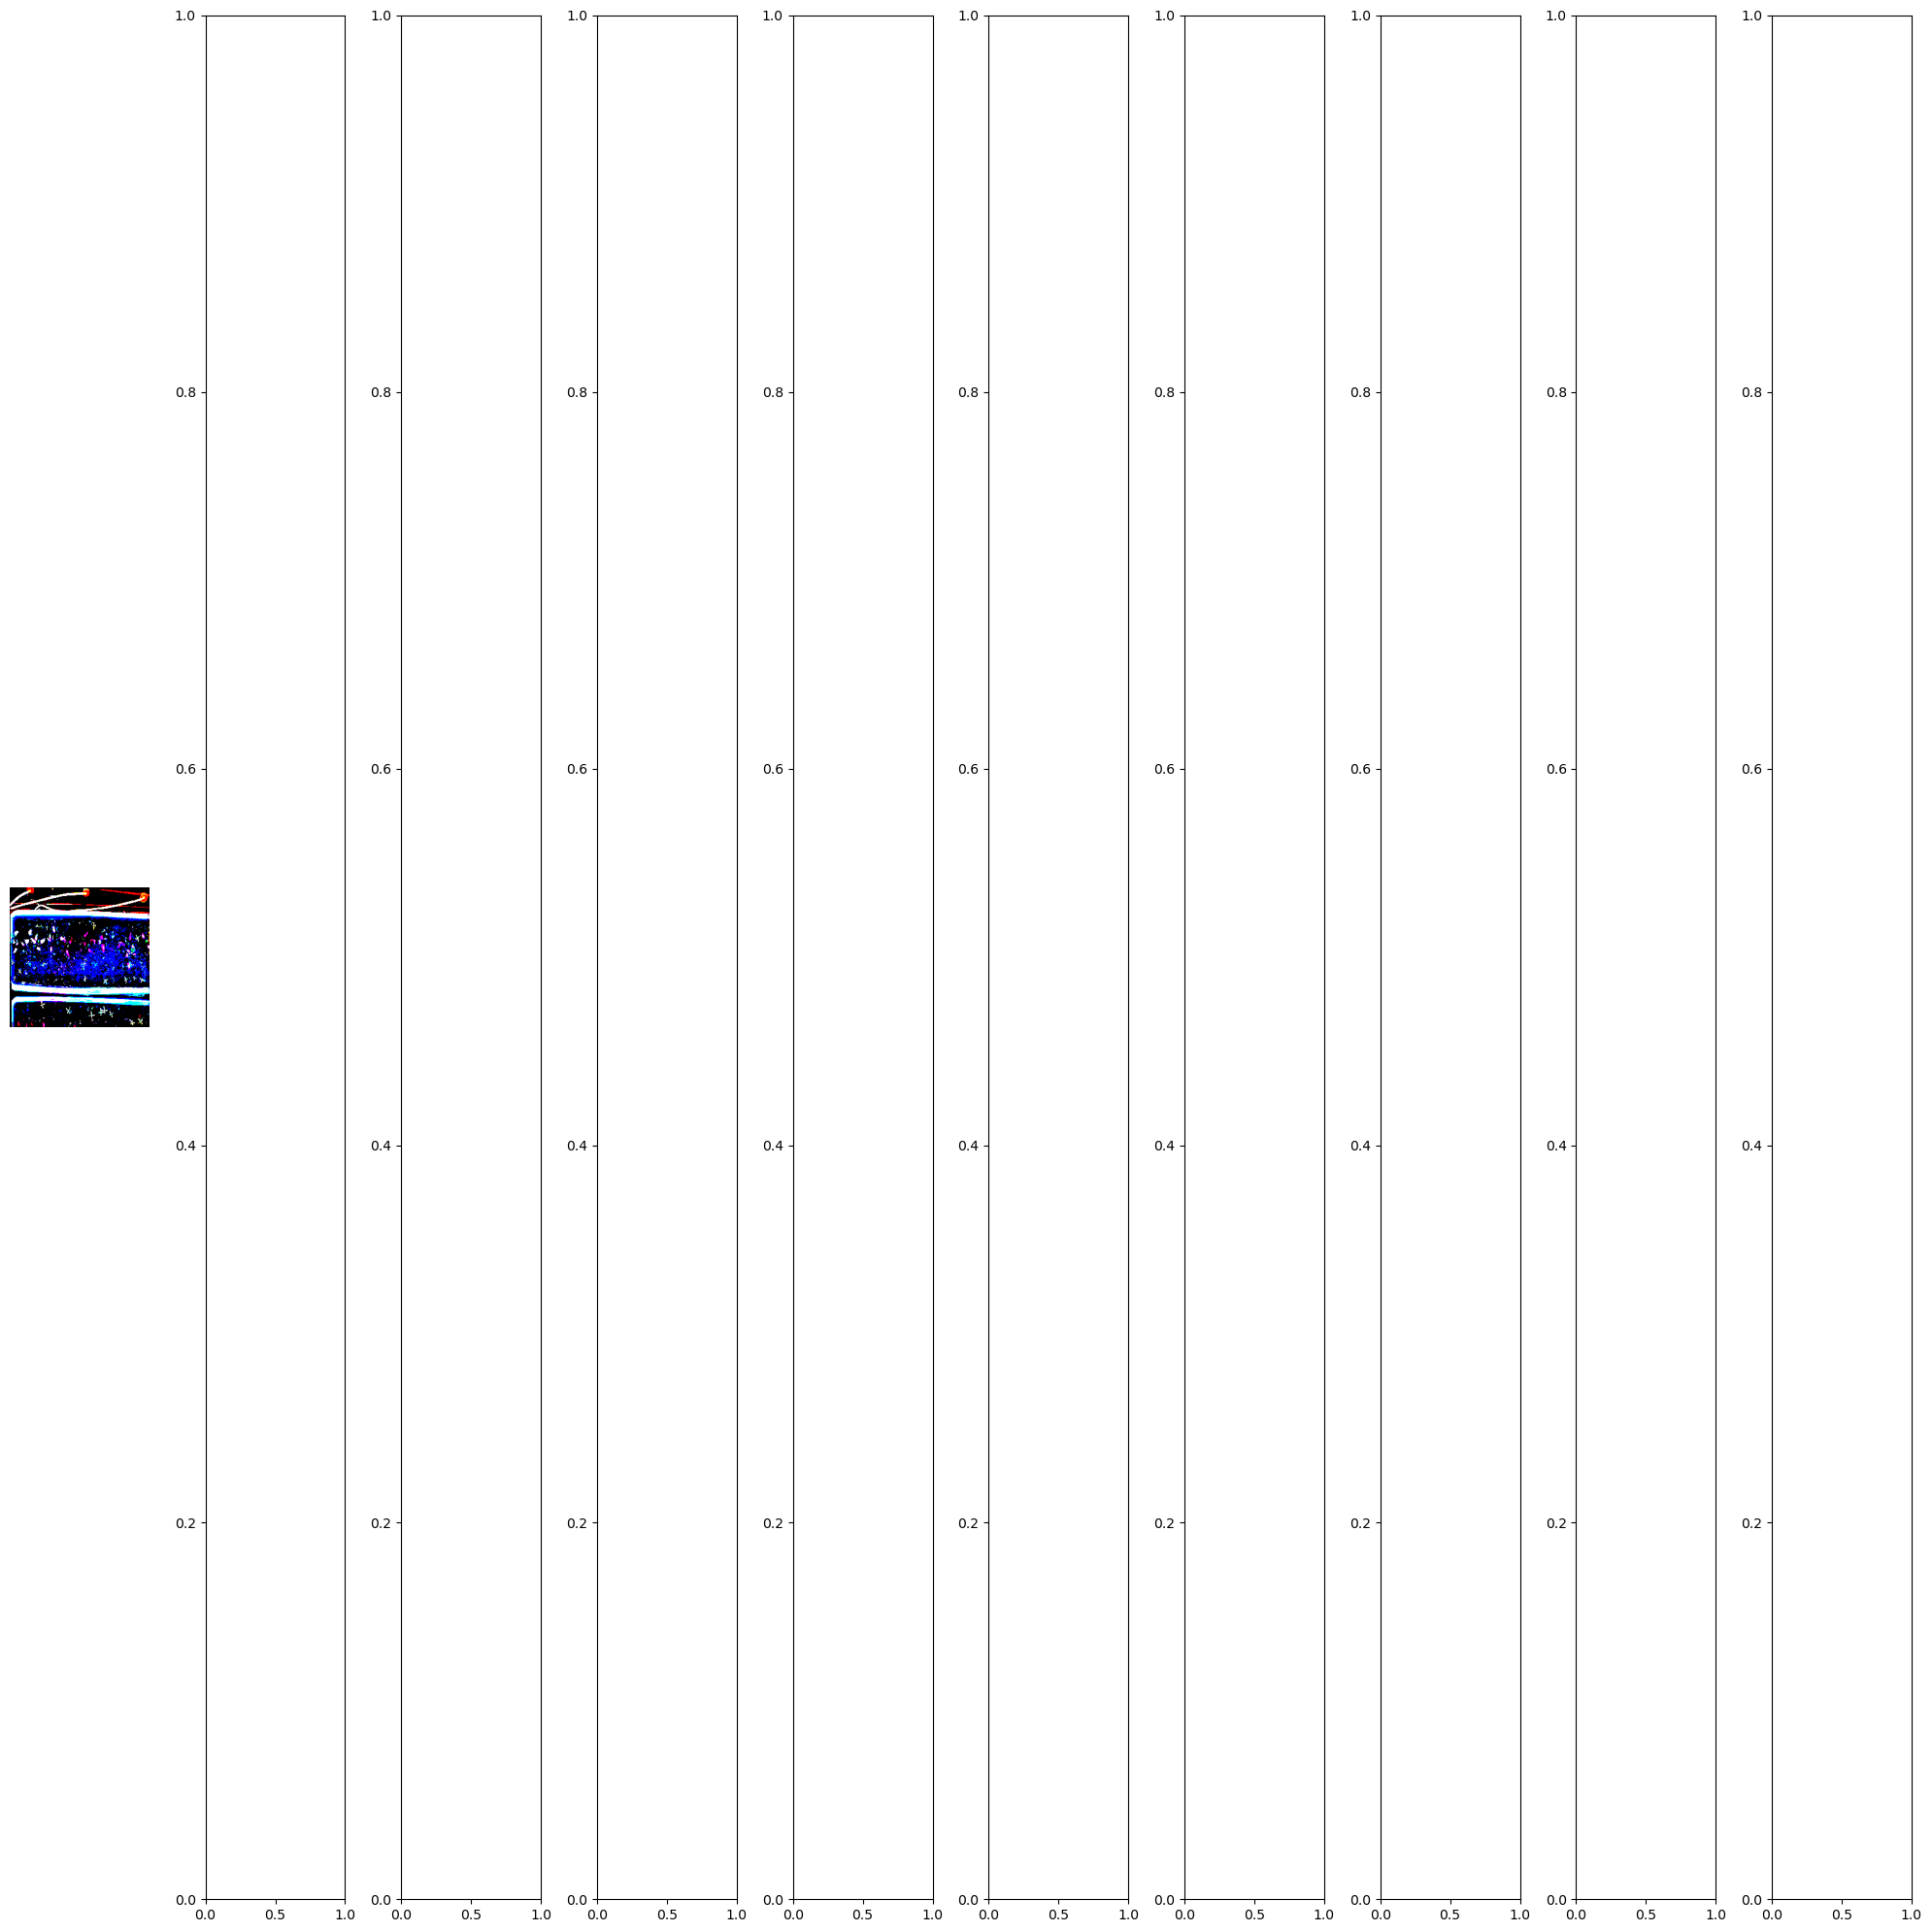

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 640x480 with 0 Axes>

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [6]:
# Assuming train_batches is your ImageDataGenerator object
imgs, labels = train_batches.next()  # This will get the next batch of images and their labels

# Now you can call your plotImages function
plotImages(imgs)
print(labels)

In [7]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(244, 244, 3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 122, 122, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 238144)            0         
                                                                 
 dense (Dense)               (None, 2)                 4

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the number of classes
num_classes = 2  # Replace 2 with the actual number of classes in your problem

# Binary classification model
binary_model = Sequential([
    # ... (previous layers)
    Flatten(),
    Dense(units=1, activation='sigmoid'),  # Binary classification
])


# Assuming you want to train the binary classification model
binary_model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [12]:
model = Sequential([
    # ... (previous layers)
    Flatten(),
    Dense(units=1, activation='sigmoid'),  # Binary classification
])
model = Sequential([
    # ... (previous layers)
    Flatten(),
    Dense(units=num_classes, activation='softmax'),  # num_classes is the number of classes
])
num_classes = 2  # Number of classes in your classification problem

model = Sequential([
    # ... (previous layers)
    Flatten(),
    Dense(units=1, activation='sigmoid'),  # Binary classification
])

model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

NameError: name 'num_classes' is not defined

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Define the number of classes
num_classes = 2  # Replace 2 with the actual number of classes in your problem

# Binary classification model
binary_model = Sequential([
    # ... (previous layers)
    Flatten(),
    Dense(units=1, activation='sigmoid'),  # Binary classification
])

# Compile the binary_model
binary_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Assuming you want to train the binary classification model
binary_model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)


Epoch 1/10
247/247 - 93s - loss: 59.7319 - accuracy: 0.5000 - val_loss: 22.2842 - val_accuracy: 0.5000 - 93s/epoch - 376ms/step
Epoch 2/10
247/247 - 87s - loss: 45.0045 - accuracy: 0.5000 - val_loss: 21.3910 - val_accuracy: 0.5000 - 87s/epoch - 354ms/step
Epoch 3/10
247/247 - 86s - loss: 47.1087 - accuracy: 0.5000 - val_loss: 20.6990 - val_accuracy: 0.5000 - 86s/epoch - 346ms/step
Epoch 4/10
247/247 - 87s - loss: 56.0510 - accuracy: 0.5000 - val_loss: 24.3600 - val_accuracy: 0.5000 - 87s/epoch - 352ms/step
Epoch 5/10
247/247 - 89s - loss: 46.8589 - accuracy: 0.5000 - val_loss: 21.4355 - val_accuracy: 0.5000 - 89s/epoch - 362ms/step
Epoch 6/10
247/247 - 94s - loss: 58.8297 - accuracy: 0.5000 - val_loss: 26.0294 - val_accuracy: 0.5000 - 94s/epoch - 381ms/step
Epoch 7/10
247/247 - 89s - loss: 64.5772 - accuracy: 0.5000 - val_loss: 23.9678 - val_accuracy: 0.5000 - 89s/epoch - 361ms/step
Epoch 8/10
247/247 - 84s - loss: 55.0016 - accuracy: 0.5000 - val_loss: 20.9149 - val_accuracy: 0.5000 -

In [19]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [24]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
type(vgg16_model)

keras.src.engine.functional.Functional

In [26]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [27]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [28]:
for layer in model.layers:
    layer.trainable = False

In [29]:
model.add(Dense(units=2, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [31]:
binary_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
binary_model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)


Epoch 1/10
247/247 - 95s - loss: 55.0221 - accuracy: 0.5000 - val_loss: 23.3649 - val_accuracy: 0.5000 - 95s/epoch - 385ms/step
Epoch 2/10
247/247 - 86s - loss: 53.2517 - accuracy: 0.5000 - val_loss: 19.9416 - val_accuracy: 0.5000 - 86s/epoch - 350ms/step
Epoch 3/10
247/247 - 89s - loss: 47.4386 - accuracy: 0.5000 - val_loss: 22.2564 - val_accuracy: 0.5000 - 89s/epoch - 362ms/step
Epoch 4/10
247/247 - 92s - loss: 48.4405 - accuracy: 0.5000 - val_loss: 29.3542 - val_accuracy: 0.5000 - 92s/epoch - 374ms/step
Epoch 5/10
247/247 - 94s - loss: 47.1123 - accuracy: 0.5000 - val_loss: 22.5550 - val_accuracy: 0.5000 - 94s/epoch - 379ms/step
Epoch 6/10
247/247 - 88s - loss: 45.8943 - accuracy: 0.5000 - val_loss: 23.4408 - val_accuracy: 0.5000 - 88s/epoch - 355ms/step
Epoch 7/10
247/247 - 86s - loss: 50.7011 - accuracy: 0.5000 - val_loss: 23.8491 - val_accuracy: 0.5000 - 86s/epoch - 349ms/step
Epoch 8/10
247/247 - 88s - loss: 59.3140 - accuracy: 0.5000 - val_loss: 22.6756 - val_accuracy: 0.5000 -

In [35]:
history = binary_model.fit(x=train_batches, validation_data=valid_batches, epochs=20, verbose=2)

# Check if the final accuracy is greater than 0.95
assert history.history.get('accuracy')[-1] > 0.95


Epoch 1/20
247/247 - 54s - loss: 46.8088 - accuracy: 0.5000 - val_loss: 30.2669 - val_accuracy: 0.5000 - 54s/epoch - 219ms/step
Epoch 2/20
247/247 - 54s - loss: 51.8915 - accuracy: 0.5000 - val_loss: 21.0138 - val_accuracy: 0.5000 - 54s/epoch - 220ms/step
Epoch 3/20
247/247 - 55s - loss: 49.4231 - accuracy: 0.5000 - val_loss: 21.2220 - val_accuracy: 0.5000 - 55s/epoch - 223ms/step
Epoch 4/20
247/247 - 54s - loss: 47.9531 - accuracy: 0.5000 - val_loss: 30.0241 - val_accuracy: 0.5000 - 54s/epoch - 217ms/step
Epoch 5/20
247/247 - 54s - loss: 51.7990 - accuracy: 0.5000 - val_loss: 24.8278 - val_accuracy: 0.5000 - 54s/epoch - 217ms/step
Epoch 6/20
247/247 - 54s - loss: 56.6047 - accuracy: 0.5000 - val_loss: 27.7944 - val_accuracy: 0.5000 - 54s/epoch - 219ms/step
Epoch 7/20
247/247 - 55s - loss: 49.8196 - accuracy: 0.5000 - val_loss: 20.4893 - val_accuracy: 0.5000 - 55s/epoch - 225ms/step
Epoch 8/20
247/247 - 54s - loss: 45.9855 - accuracy: 0.5000 - val_loss: 25.8072 - val_accuracy: 0.5000 -

AssertionError: 

In [47]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [48]:
test_labels = test_batches.classes

In [49]:
predictions = binary_model.predict(x=test_batches, verbose=0)

In [50]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [51]:
test_batches.class_indices

{'images': 0, 'labels': 1}

In [53]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Confusion matrix, without normalization
[[1.]]


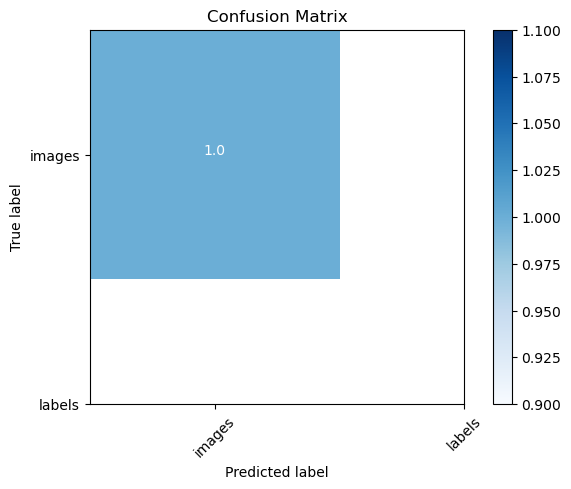

In [55]:
cm_plot_labels = ['images', 'labels']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')